In [1]:
from work.models.decoder import RecurrentActivityClassificationNetwork

model = RecurrentActivityClassificationNetwork(1, 1, stateful=True)
model.load_weights('../models/training/lstm_activity_classification/lstm_activity_classification_01_e100.hdf5')
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Using Theano backend.


In [3]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)

Using Theano backend.


In [4]:
video = None
for v in dataset.videos:
    if v.video_id == 'Zn84iOuIkDs':
        video = v
print(video.serialize())
video_path = '../downloads/dataset/validation/'+video.video_id+'.mp4'

{'url': 'https://www.youtube.com/watch?v=Zn84iOuIkDs', 'num_frames': 2194, 'annotations': [{'segment': [0.01, 81.321], 'label': 'Clipping cat claws'}], 'subset': 'validation', 'duration': 81.363, 'resolution': '320x240'}


In [5]:
import numpy as np
features = np.load('../downloads/features/Zn84iOuIkDs.npy')
print(features[:,:].shape)
nb_instances = features.shape[0]

features = features.reshape(nb_instances, 1, 4096)
print(features.shape)
model.reset_states()
YY=model.predict_classes(features, batch_size=1)


(137, 4096)
(137, 1, 4096)
137/137 [==============================] - 2s     


In [6]:
video.get_video_instances(16, 0)
ground_trouth = np.array([instance.output for instance in video.instances])
print(ground_trouth)

[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22]


In [7]:
print(YY.shape)
YY=YY.reshape(nb_instances)
print(YY)
print(ground_trouth)


(137, 1)
[  0   0   0   0   0   0   0 152 150 150 150   0   0   0 149 149  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22   0   0  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22   0   0  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22]


In [8]:
dataset.get_output_index(video.label)

22

In [9]:
print(video.subset)

validation


In [10]:
print(ground_trouth==YY)

[False False False False False False False False False False False False
 False False False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False]


In [11]:
counts = np.bincount(YY)
print(counts)

[42  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 89  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  2
  3  0  1]


In [12]:
predicted_class = np.argmax(np.bincount(YY)[1:])+1

In [13]:
print(predicted_class)

22


In [14]:
k_3 = np.argsort(counts[1:])[::-1][:3] + 1
print(k_3)

(counts[k_3]/np.sum(counts[1:]))

[ 22 150 149]


array([ 0.93684211,  0.03157895,  0.02105263])

In [15]:
from work.processing.output import get_top_k_predictions, get_top_k_predictions_score

top_3 = get_top_k_predictions(YY, 3)
print(top_3)
_, scores = get_top_k_predictions_score(YY, 3)
print(scores)
for index in top_3:
    print(scores, dataset.labels[index][1])

[ 22 150 149]
[ 0.93684211  0.03157895  0.02105263]
[ 0.93684211  0.03157895  0.02105263] Clipping cat claws
[ 0.93684211  0.03157895  0.02105263] Ironing clothes
[ 0.93684211  0.03157895  0.02105263] Washing hands


In [16]:
print(ground_trouth)

[22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22 22
 22 22 22 22 22 22 22 22 22 22 22 22]


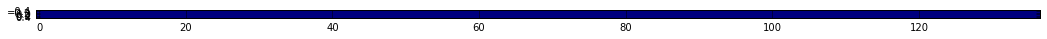

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(num=None, figsize=(18, 1), dpi=100)
plt.imshow(ground_trouth.reshape(1,nb_instances).astype(np.float32))
plt.show()

In [18]:
print(video.label)

Clipping cat claws


In [19]:
print(video.url)

https://www.youtube.com/watch?v=Zn84iOuIkDs


In [20]:
score = np.sum(YY==ground_trouth)/len(YY)

In [21]:
print(score)

0.649635036496


In [30]:
import random

videos = dataset.get_subset_videos('validation')
v = random.choice(videos)
print(v.video_id)

kt3hzGla8r4


In [23]:
print(YY)

[  0   0   0   0   0   0   0 152 150 150 150   0   0   0 149 149  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22   0   0  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22   0   0  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]


In [24]:
np.save('YY', YY)

In [25]:
from work.dataset.activitynet import ActivityNetDataset

dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt'
)
video = None
for v in dataset.videos:
    if v.video_id == 'Zn84iOuIkDs':
        video = v

import numpy as np
from work.processing.output import get_temporal_predictions

YY = np.load('YY.npy')
print(YY)

predictions = get_temporal_predictions(YY, fps=video.num_frames/video.duration, clip_length=16)

print(predictions)

[  0   0   0   0   0   0   0 152 150 150 150   0   0   0 149 149  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22   0   0  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22   0   0  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22  22
  22   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0]
[{'segment': [9.49358614402917, 23.140616226071103], 'label': 22, 'score': 1}, {'segment': [24.32731449407475, 36.19429717411121], 'label': 22, 'score': 1}, {'segment': [37.38099544211486, 64.67505560619873], 'label': 22, 'score': 1}]


In [4]:
import numpy as np
instances = np.array([video.num_frames//16 for video in dataset.videos])

In [5]:
print(np.min(instances))
print(np.max(instances))

1
1826


In [6]:
np.argmin(instances)

2035

In [7]:
dataset.videos[_].serialize()

{'annotations': [{'label': 'Throwing darts',
   'segment': [0.19999999999999998, 2.865034013605442]}],
 'duration': 3.066,
 'num_frames': 29,
 'resolution': '320x240',
 'subset': 'validation',
 'url': 'https://www.youtube.com/watch?v=j73Wh1olDsA'}